In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing custom functions
from preprocess import load_data, handle_missing_values, standardize_features, encode_categorical_features, split_data
from utils import plot_pairwise_relationships, plot_box_plots, plot_violin_plots, plot_count_plots, plot_correlation_matrices, do_umap, plot_umap
from utils import train_linear_regression, perform_feature_selection, show_metrics, do_one_hot_encoding, train_ridge, train_ridge_along_with_ica, do_elastic_net, train_gradient_boosting

In [2]:
# Load Data
file_path = 'Electricity BILL.csv' 
data = load_data(file_path)

# Display first few rows of the dataset
data.head()

Building_Type  Construction_Year  Number_of_Floors  \
0    Residential               1989                12   
1  Institutional               1980                 6   
2     Industrial               2006                10   
3     Commercial               1985                 1   
4     Industrial               2006                12   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   50.000000                477.681762   
1                  225.759107                200.000000   
2                   98.755927                200.000000   
3                   68.470692                200.000000   
4                   50.000000                347.093644   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                  48.417266       81.814110           13.780635   
1                  46.405516       45.109000           10.177771   
2                  17.247585       48.526225           27.757026   
3                  57.719480       76.335921            1.519812   
4                  26.936862       96.511319            1.874753   

   Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                    6                0                     7.211768   
1                   10                0                    34.139492   
2                    2                1                     6.224612   
3                    2                0                     5.327398   
4                   19                0                     7.060854   

     Building_Status Maintenance_Priority  Energy_Per_SqM  \
0  Under Maintenance                 High      174.835708   
1  Under Maintenance                 High      143.086785   
2        Operational               Medium      182.384427   
3             Closed                  Low      226.151493   
4             Closed               Medium      138.292331   

   Number_of_Residents  Electricity_Bill  
0                  360      16408.008770  
1                   91      15230.425070  
2                  115       8117.632795  
3                  159      13030.707160  
4                  258      25848.853740

In [3]:
# Handle Missing Values
data = handle_missing_values(data)

Total missing values in the dataset: 0


In [4]:
#  Encode Categorical Features
encoded_data, label_encoders = encode_categorical_features(data)

# Display first few rows of the encoded data
encoded_data.head()

Building_Type  Construction_Year  Number_of_Floors  \
0              3               1989                12   
1              2               1980                 6   
2              1               2006                10   
3              0               1985                 1   
4              1               2006                12   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   50.000000                477.681762   
1                  225.759107                200.000000   
2                   98.755927                200.000000   
3                   68.470692                200.000000   
4                   50.000000                347.093644   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                  48.417266       81.814110           13.780635   
1                  46.405516       45.109000           10.177771   
2                  17.247585       48.526225           27.757026   
3                  57.719480       76.335921            1.519812   
4                  26.936862       96.511319            1.874753   

   Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                    6                0                     7.211768   
1                   10                0                    34.139492   
2                    2                1                     6.224612   
3                    2                0                     5.327398   
4                   19                0                     7.060854   

   Building_Status  Maintenance_Priority  Energy_Per_SqM  Number_of_Residents  \
0                2                     0      174.835708                  360   
1                2                     0      143.086785                   91   
2                1                     2      182.384427                  115   
3                0                     1      226.151493                  159   
4                0                     2      138.292331                  258   

   Electricity_Bill  
0      16408.008770  
1      15230.425070  
2       8117.632795  
3      13030.707160  
4      25848.853740

In [5]:
# Standardize Features
scaled_data = standardize_features(encoded_data.drop(columns=['Electricity_Bill'],axis=1))

scaled_data['Electricity_Bill'] = encoded_data['Electricity_Bill']
# Display first few rows of scaled data
scaled_data.head()

Building_Type  Construction_Year  Number_of_Floors  \
0       1.360270          -0.492995          1.294186   
1       0.455354          -1.066600         -0.296505   
2      -0.449562           0.590482          0.763956   
3      -1.354479          -0.747930         -1.622080   
4      -0.449562           0.590482          1.294186   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   -0.814197                 -0.349153   
1                    1.621769                 -0.921691   
2                   -0.138455                 -0.921691   
3                   -0.558199                 -0.921691   
4                   -0.814197                 -0.618406   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                   1.205746        0.300178           -0.793583   
1                   1.081897       -2.132641           -0.900518   
2                  -0.713141       -1.906147           -0.378754   
3                   1.778415       -0.062917           -1.157493   
4                  -0.116644        1.274310           -1.146958   

   Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0             0.232814        -0.558254                    -0.350170   
1             1.464636        -0.558254                     3.568630   
2            -0.999007         1.791300                    -0.493831   
3            -0.999007        -0.558254                    -0.624403   
4             4.236234        -0.558254                    -0.372132   

   Building_Status  Maintenance_Priority  Energy_Per_SqM  Number_of_Residents  \
0         1.253477             -1.254289        0.467149             0.751504   
1         1.253477             -1.254289       -0.186815            -1.116230   
2         0.032241              1.184064        0.622638            -0.949592   
3        -1.188995             -0.035112        1.524152            -0.644089   
4        -1.188995              1.184064       -0.285571             0.043293   

   Electricity_Bill  
0      16408.008770  
1      15230.425070  
2       8117.632795  
3      13030.707160  
4      25848.853740

In [6]:
# Prepare Data for Modeling
X_train, X_test, y_train, y_test = split_data(scaled_data, target_column='Electricity_Bill')

# Display shapes of train and test sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1000, 15)
Testing set shape: (250, 15)


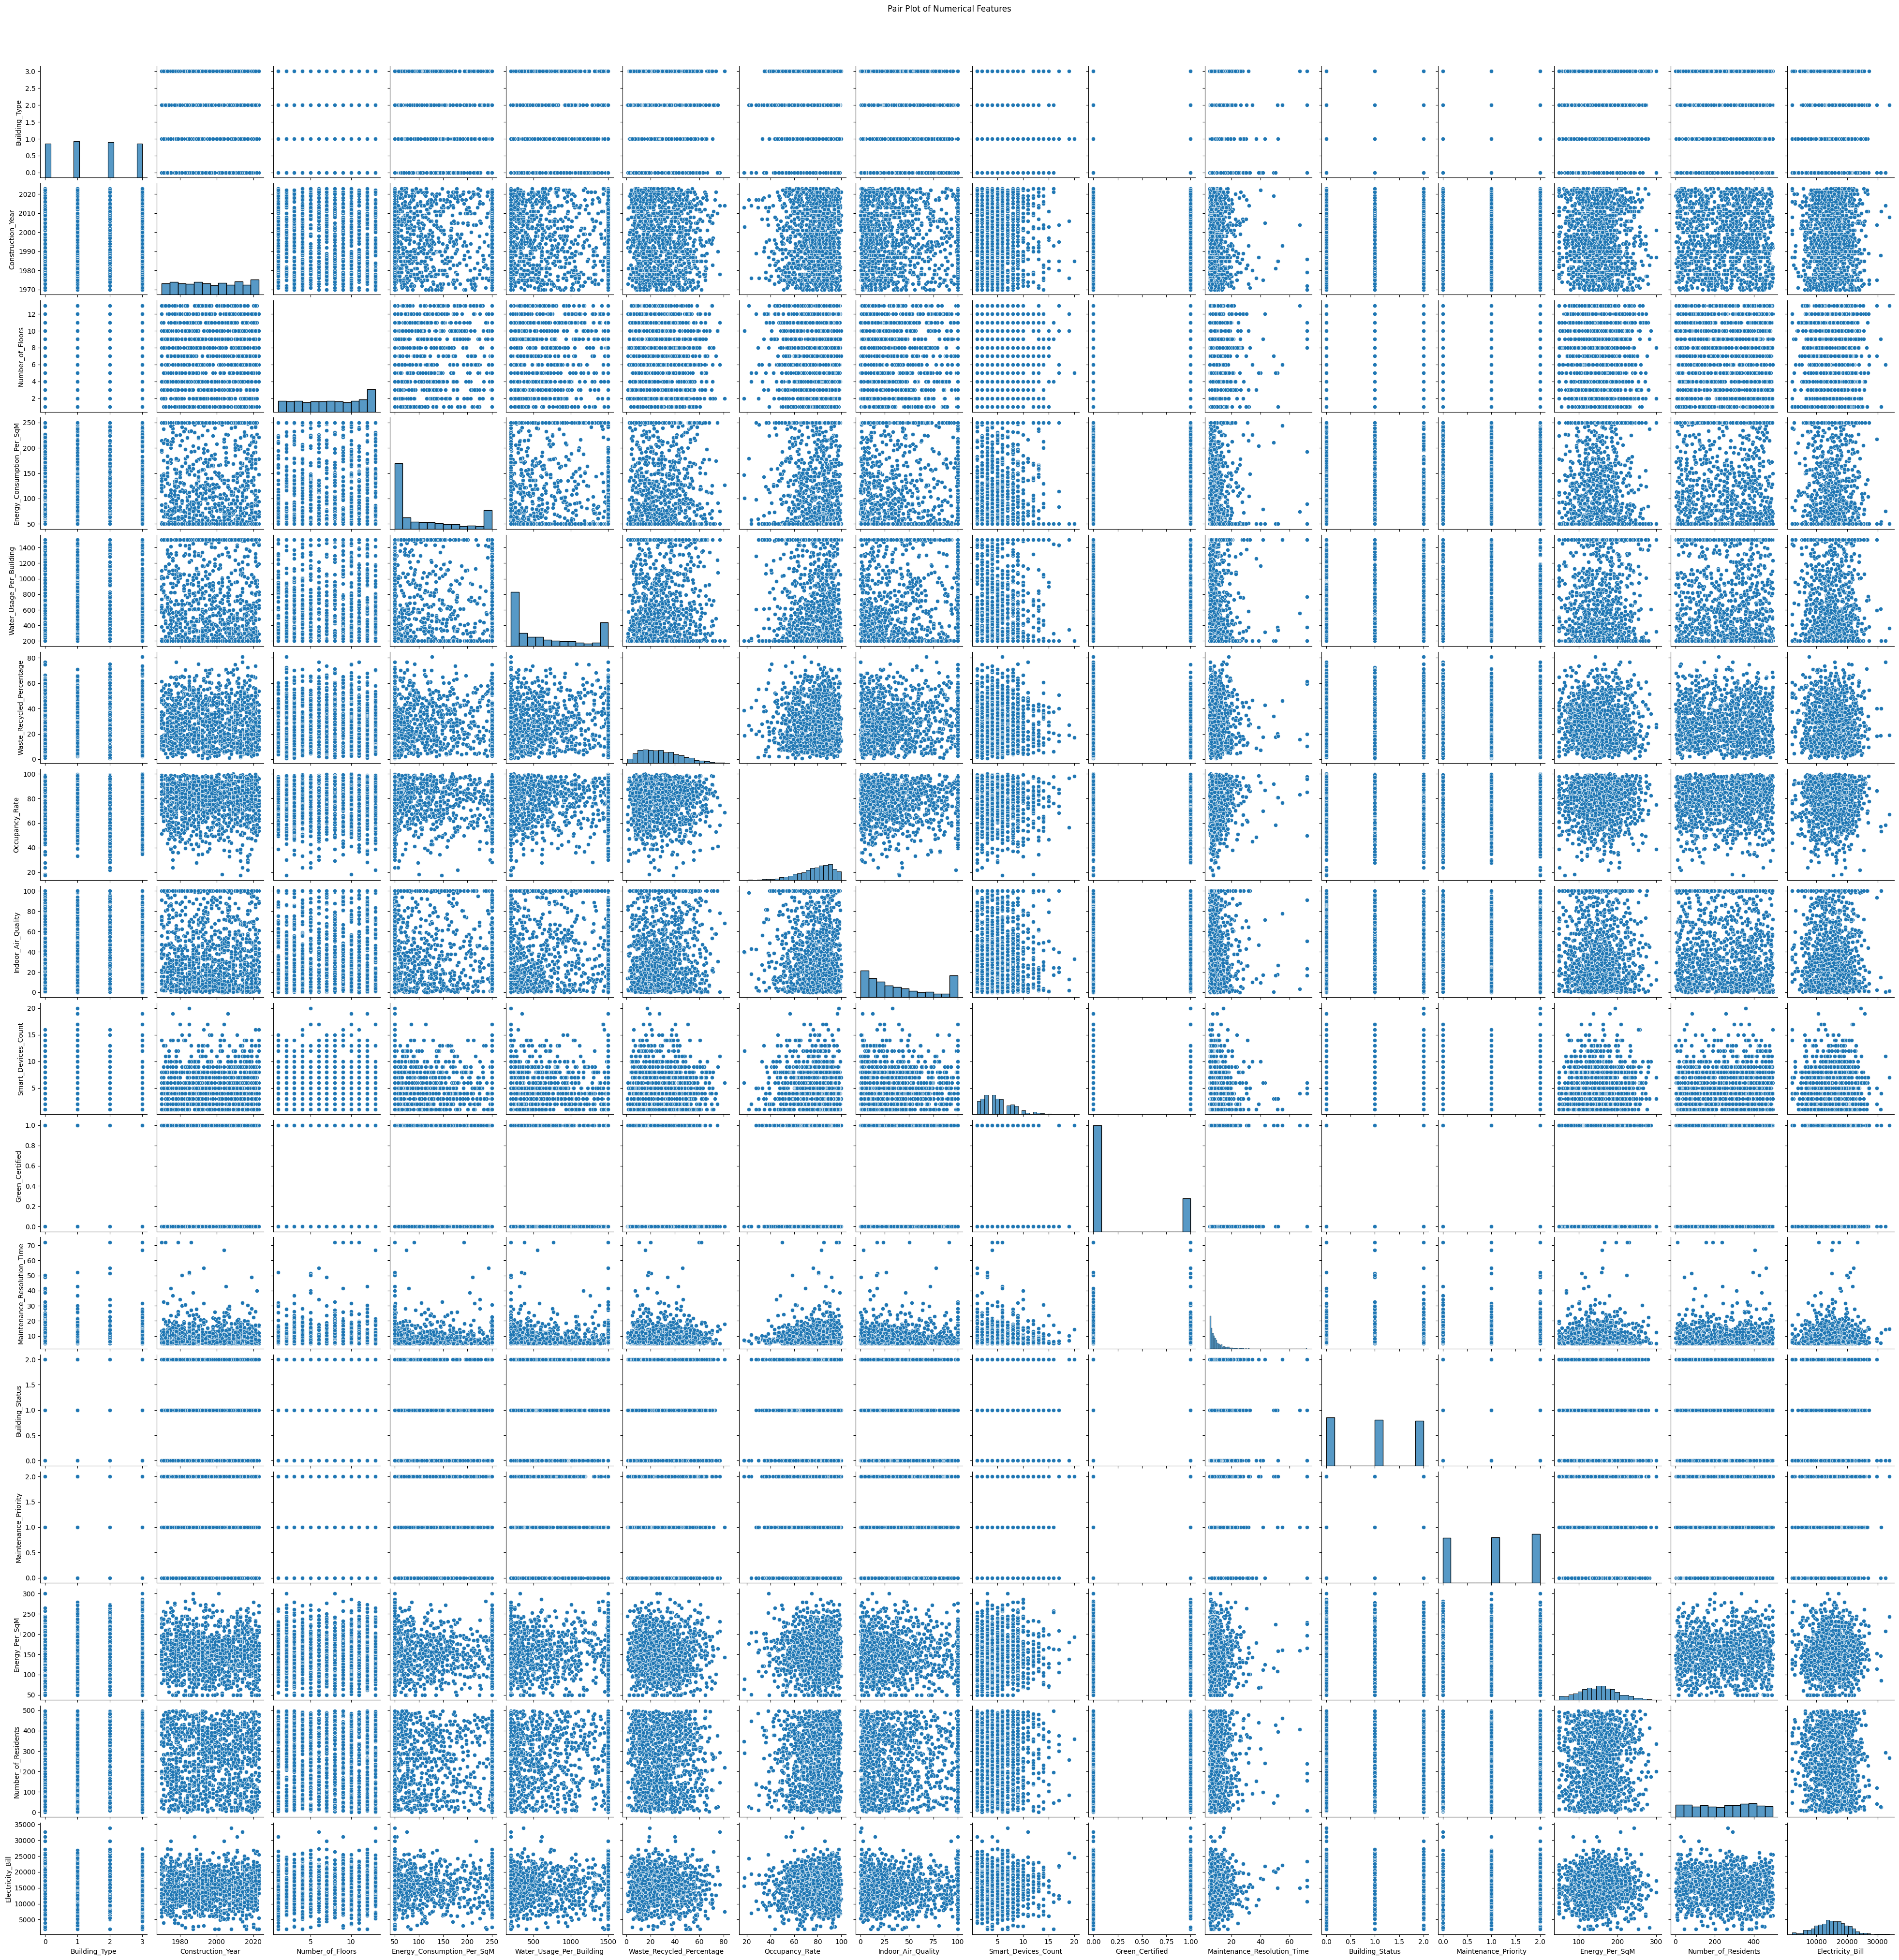

In [7]:
# Plot Visualizations
# Plot pairwise relationships
plot_pairwise_relationships(encoded_data)

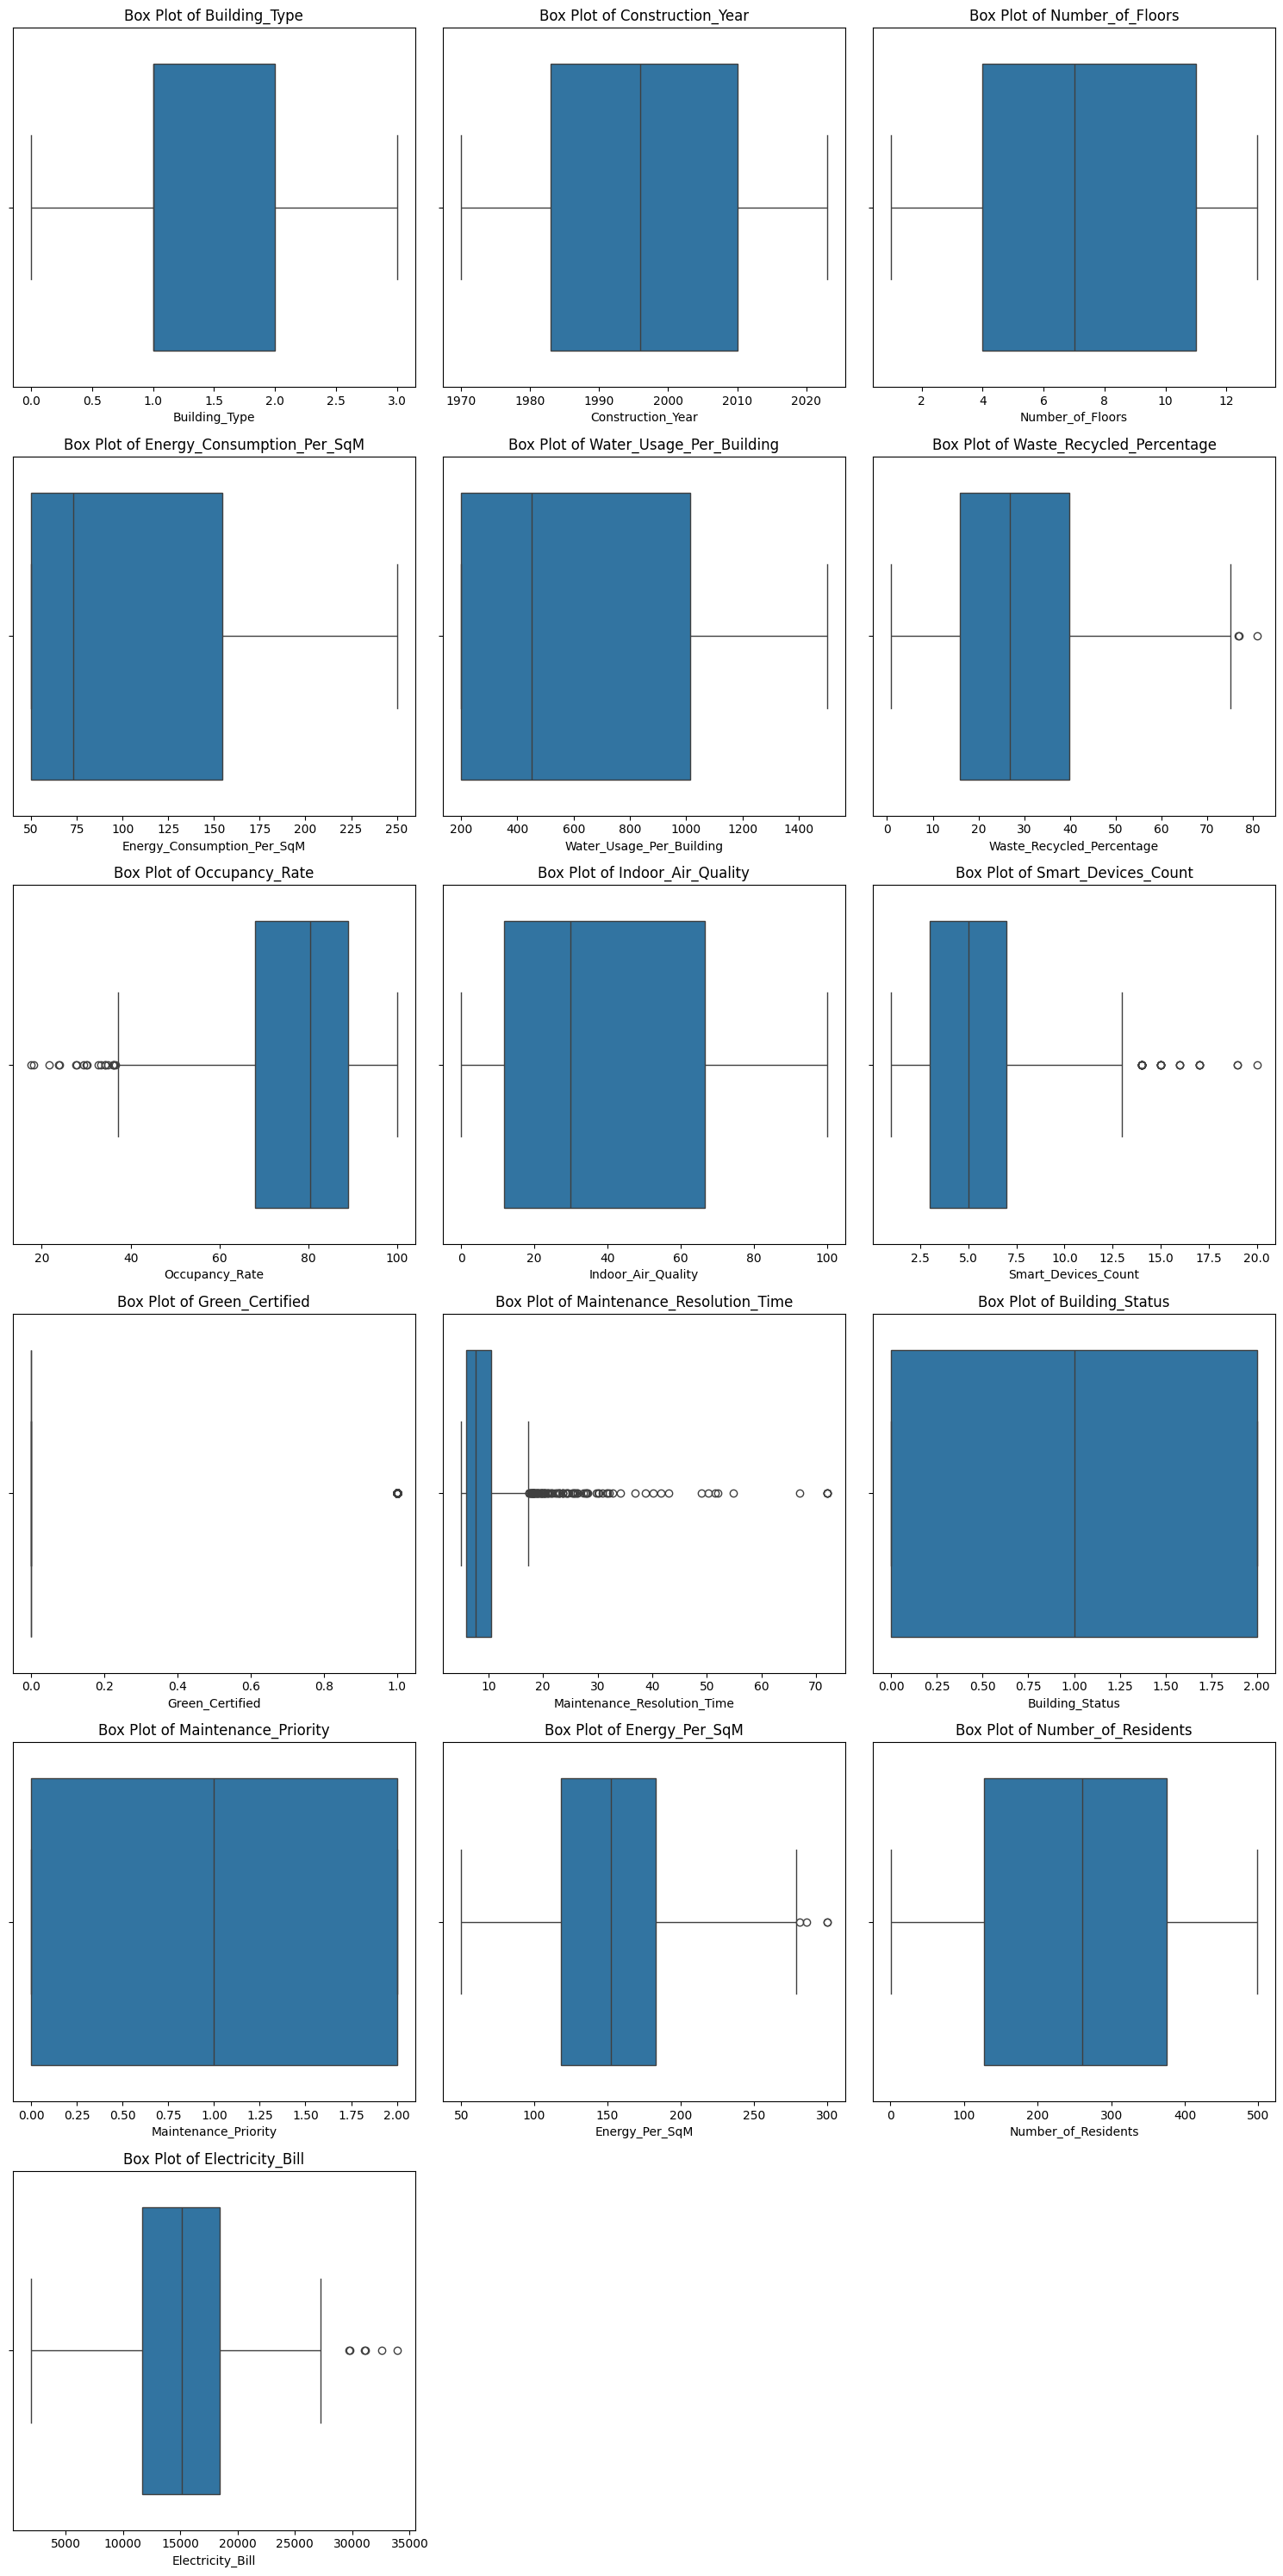

In [8]:
# Plot box plots for numerical features
numerical_columns = encoded_data.select_dtypes(include=[np.number]).columns
plot_box_plots(encoded_data, numerical_columns)

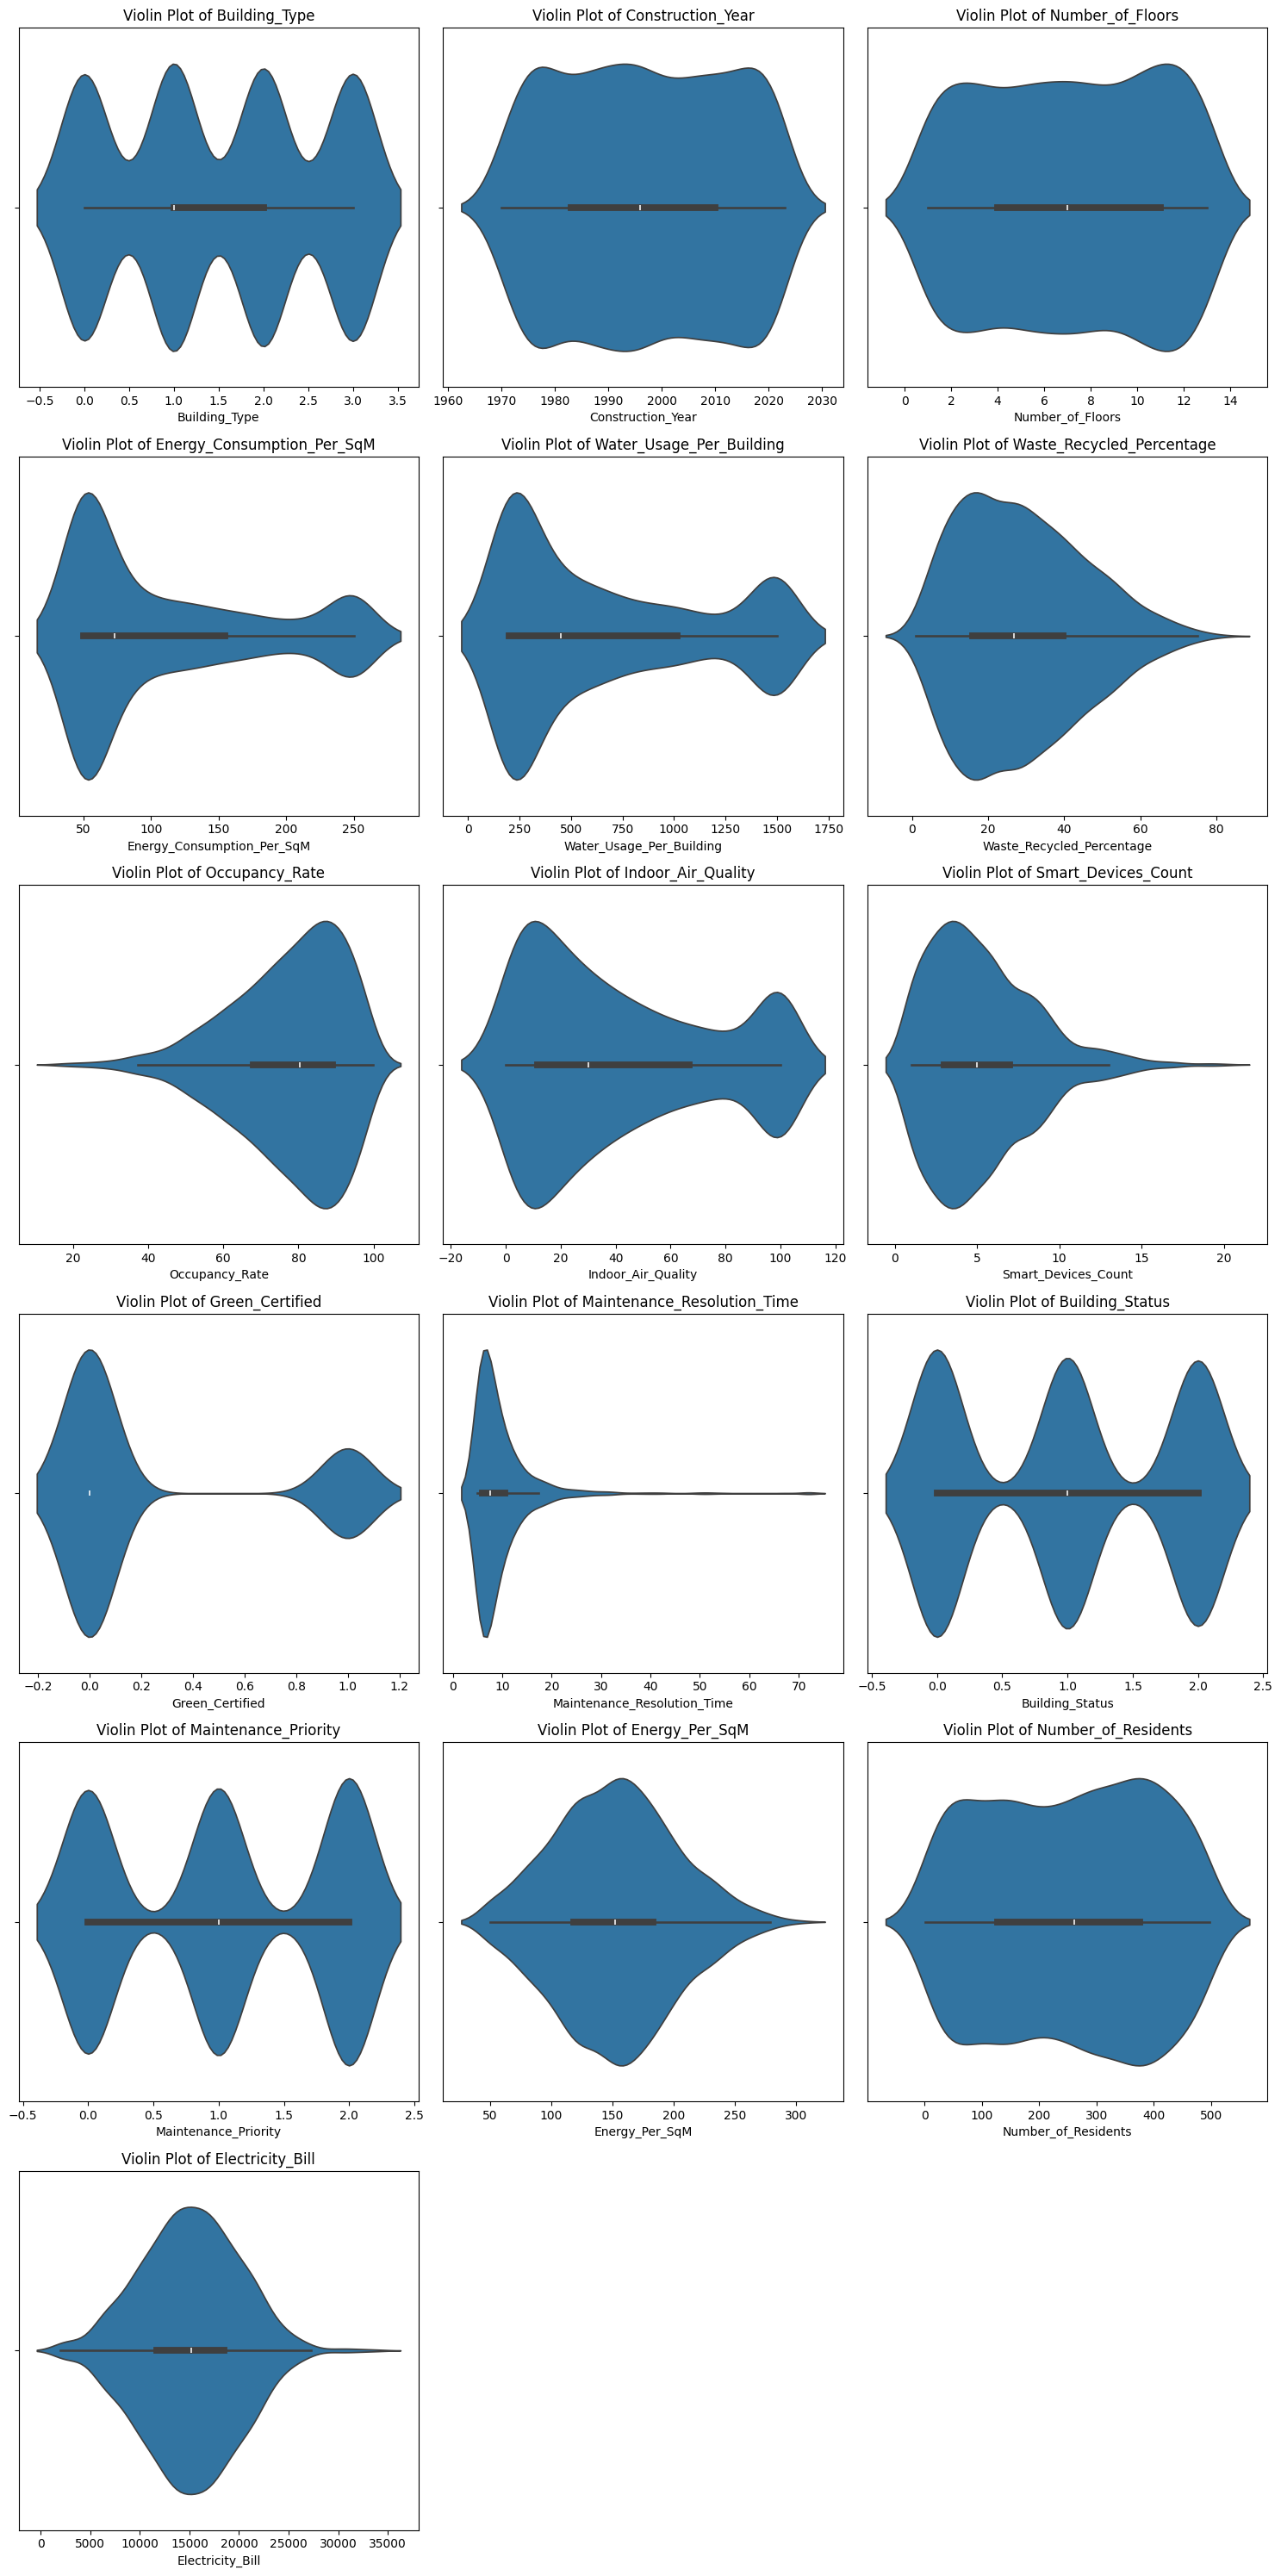

In [9]:

plot_violin_plots(encoded_data, numerical_columns)

Index(['Building_Type', 'Building_Status', 'Maintenance_Priority'], dtype='object')


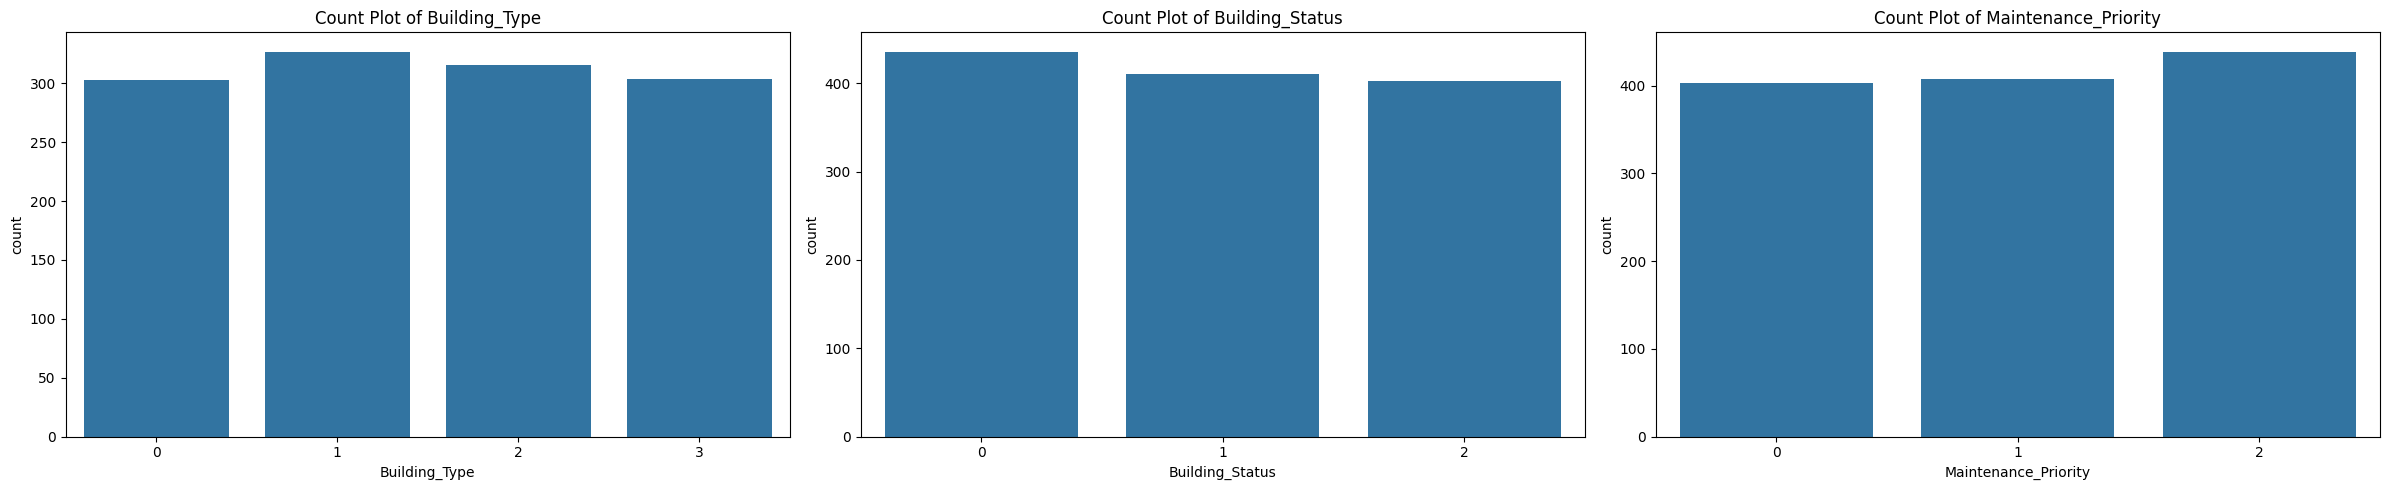

In [10]:
# Plot count plots for categorical features
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)
plot_count_plots(encoded_data, categorical_columns)

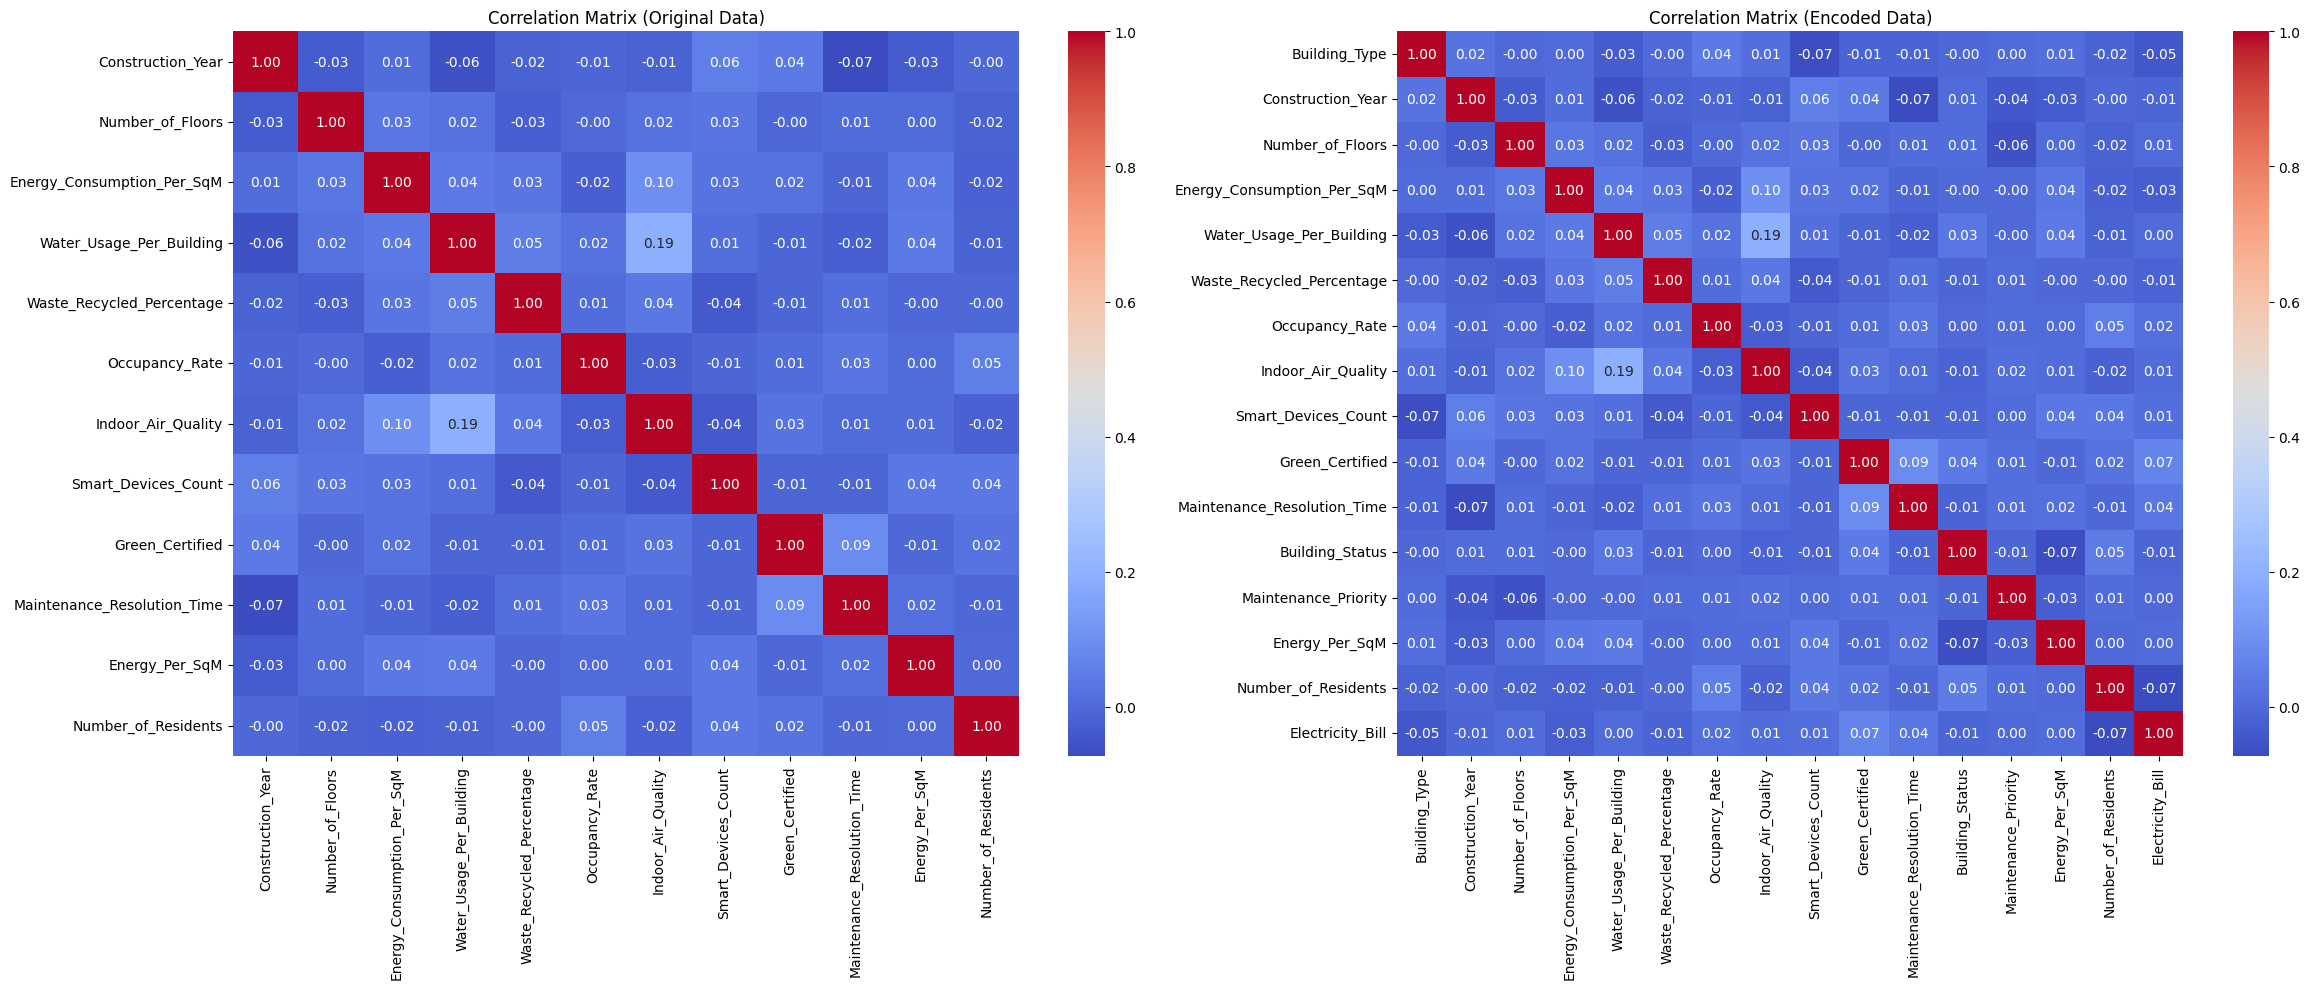

In [11]:
# Plot correlation matrices
plot_correlation_matrices(data.drop(columns=categorical_columns), encoded_data, target_column='Electricity_Bill')

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


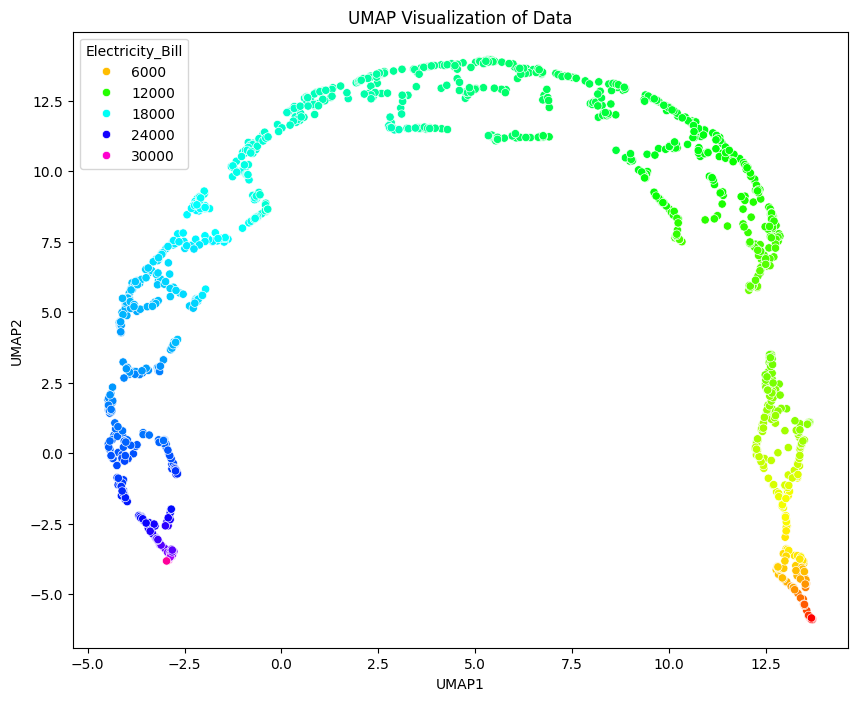

In [12]:
unscaled_unencoded_data = data.drop(columns=categorical_columns)
unscaled_unencoded_data_umap = do_umap(unscaled_unencoded_data, data.drop(categorical_columns, axis = 1))

umap_data = unscaled_unencoded_data_umap.drop(columns="Electricity_Bill")

# Plot UMAP
# plt.figure(figsize=(10, 8))
# sns.scatterplot(
#     x=umap_data.iloc[:, 0], 
#     y=umap_data.iloc[:, 1], 
#     hue=unscaled_unencoded_data_umap['Electricity_Bill'], 
#     palette=sns.color_palette("hsv", as_cmap=True)
# )
# plt.title("UMAP Visualization of Data")
# plt.show()

plot_umap(umap_data, unscaled_unencoded_data_umap['Electricity_Bill'])

In [13]:
model = train_linear_regression(X_train, y_train)
show_metrics(model, X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

+-------------+----------------+----------------+
| Metric      |       Training |        Testing |
+=============+================+================+
| MAE         |     4006.32847 |     3842.40931 |
+-------------+----------------+----------------+
| MSE         | 24475013.16848 | 24278016.15574 |
+-------------+----------------+----------------+
| RMSE        |     4947.22277 |     4927.27269 |
+-------------+----------------+----------------+
| R2          |        0.01392 |        0.00004 |
+-------------+----------------+----------------+
| Adjusted R2 |       -0.00111 |       -0.06406 |
+-------------+----------------+----------------+


In [14]:
rfe_features, kbest_features = perform_feature_selection(X_train, y_train, num_features=3)
print(f"Top features by RFE: {rfe_features}")
print(f"Top features by SelectKBest: {kbest_features}")

Top features by RFE: Index(['Building_Type', 'Green_Certified', 'Number_of_Residents'], dtype='object')
Top features by SelectKBest: Index(['Building_Type', 'Green_Certified', 'Number_of_Residents'], dtype='object')


In [15]:
model_rfe = train_linear_regression(X_train[rfe_features], y_train)
show_metrics(model_rfe, X_train=X_train[rfe_features], y_train=y_train, X_test=X_test[rfe_features], y_test=y_test)

+-------------+----------------+----------------+
| Metric      |       Training |        Testing |
+=============+================+================+
| MAE         |     4006.47338 |     3813.94813 |
+-------------+----------------+----------------+
| MSE         | 24569032.90690 | 23941409.06300 |
+-------------+----------------+----------------+
| RMSE        |     4956.71594 |     4892.99592 |
+-------------+----------------+----------------+
| R2          |        0.01013 |        0.01390 |
+-------------+----------------+----------------+
| Adjusted R2 |        0.00715 |        0.00188 |
+-------------+----------------+----------------+


In [16]:
data_one_hot_encoded = do_one_hot_encoding(data, categorical_columns)

X_train_one_hot_encoded, X_test_one_hot_encoded, y_train, y_test = split_data(data_one_hot_encoded, target_column='Electricity_Bill')

model_ridge = train_ridge(X_train_one_hot_encoded, y_train, alpha=0.1)

show_metrics(model_ridge, X_train=X_train_one_hot_encoded, y_train=y_train, X_test=X_test_one_hot_encoded, y_test=y_test)

+-------------+----------------+----------------+
| Metric      |       Training |        Testing |
+=============+================+================+
| MAE         |     3976.69786 |     3797.49780 |
+-------------+----------------+----------------+
| MSE         | 24188925.36639 | 24130089.94311 |
+-------------+----------------+----------------+
| RMSE        |     4918.22380 |     4912.23879 |
+-------------+----------------+----------------+
| R2          |        0.02545 |        0.00613 |
+-------------+----------------+----------------+
| Adjusted R2 |        0.00655 |       -0.07597 |
+-------------+----------------+----------------+


In [17]:
n_components = [4,5,6,7]

model_ridge_with_ica = train_ridge_along_with_ica(X_train=X_train_one_hot_encoded,X_test=X_test_one_hot_encoded,y_train=y_train, y_test=y_test, n_components_list=n_components)


Performing ICA with 4 components

Data Metrics with ICA (n_components=4)
+-------------+----------------+----------------+
| Metric      |       Training |        Testing |
+=============+================+================+
| MAE         |     4010.98390 |     3877.43997 |
+-------------+----------------+----------------+
| MSE         | 24701058.76241 | 24726610.05814 |
+-------------+----------------+----------------+
| RMSE        |     4970.01597 |     4972.58585 |
+-------------+----------------+----------------+
| R2          |        0.00482 |       -0.01844 |
+-------------+----------------+----------------+
| Adjusted R2 |        0.00081 |       -0.03507 |
+-------------+----------------+----------------+

Performing ICA with 5 components

Data Metrics with ICA (n_components=5)
+-------------+----------------+----------------+
| Metric      |       Training |        Testing |
+=============+================+================+
| MAE         |     4008.43590 |     3881.23266 |
+-

In [18]:
alpha_values = [0.1, 0.5, 2.0]

for alpha in alpha_values:
    model_elastic_net = do_elastic_net(X_train, y_train, alpha)
    print(f"\nData Metrics on Elastic Net with alpha={alpha})")
    show_metrics(model_elastic_net, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
    print("\n")


Data Metrics on Elastic Net with alpha=0.1)
+-------------+----------------+----------------+
| Metric      |       Training |        Testing |
+=============+================+================+
| MAE         |     4005.46931 |     3841.13332 |
+-------------+----------------+----------------+
| MSE         | 24475813.08348 | 24267836.21696 |
+-------------+----------------+----------------+
| RMSE        |     4947.30362 |     4926.23956 |
+-------------+----------------+----------------+
| R2          |        0.01389 |        0.00046 |
+-------------+----------------+----------------+
| Adjusted R2 |       -0.00114 |       -0.06362 |
+-------------+----------------+----------------+



Data Metrics on Elastic Net with alpha=0.5)
+-------------+----------------+----------------+
| Metric      |       Training |        Testing |
+=============+================+================+
| MAE         |     4003.20216 |     3837.75494 |
+-------------+----------------+----------------+
| MSE   

In [19]:
model_gradient_boosting = train_gradient_boosting(X_train, y_train)
show_metrics(model_gradient_boosting, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

+-------------+----------------+----------------+
| Metric      |       Training |        Testing |
+=============+================+================+
| MAE         |     3092.74819 |     3815.70321 |
+-------------+----------------+----------------+
| MSE         | 14926446.25731 | 24392500.90114 |
+-------------+----------------+----------------+
| RMSE        |     3863.47593 |     4938.87648 |
+-------------+----------------+----------------+
| R2          |        0.39863 |       -0.00468 |
+-------------+----------------+----------------+
| Adjusted R2 |        0.38946 |       -0.06908 |
+-------------+----------------+----------------+
